<a href="https://colab.research.google.com/github/1kaiser/Parvati_track_analysis/blob/main/MODIS_ReflectanceAltimetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODIS bands vs ICESAT 2 *altimetry*

In [ ]:
!wget https://github.com/1kaiser/ICESAT2/releases/download/1/pongdam_dem.tif #getting Pong Dam dem
!wget https://github.com/1kaiser/Parvati_track_analysis/releases/download/2/processed_ATL03_20210703105408_01501202_005_01.h5
!wget https://github.com/1kaiser/Parvati_track_analysis/releases/download/2/SATELLITE.zip

In [ ]:
!unzip /content/SATELLITE.zip

In [ ]:
!pip install rasterio

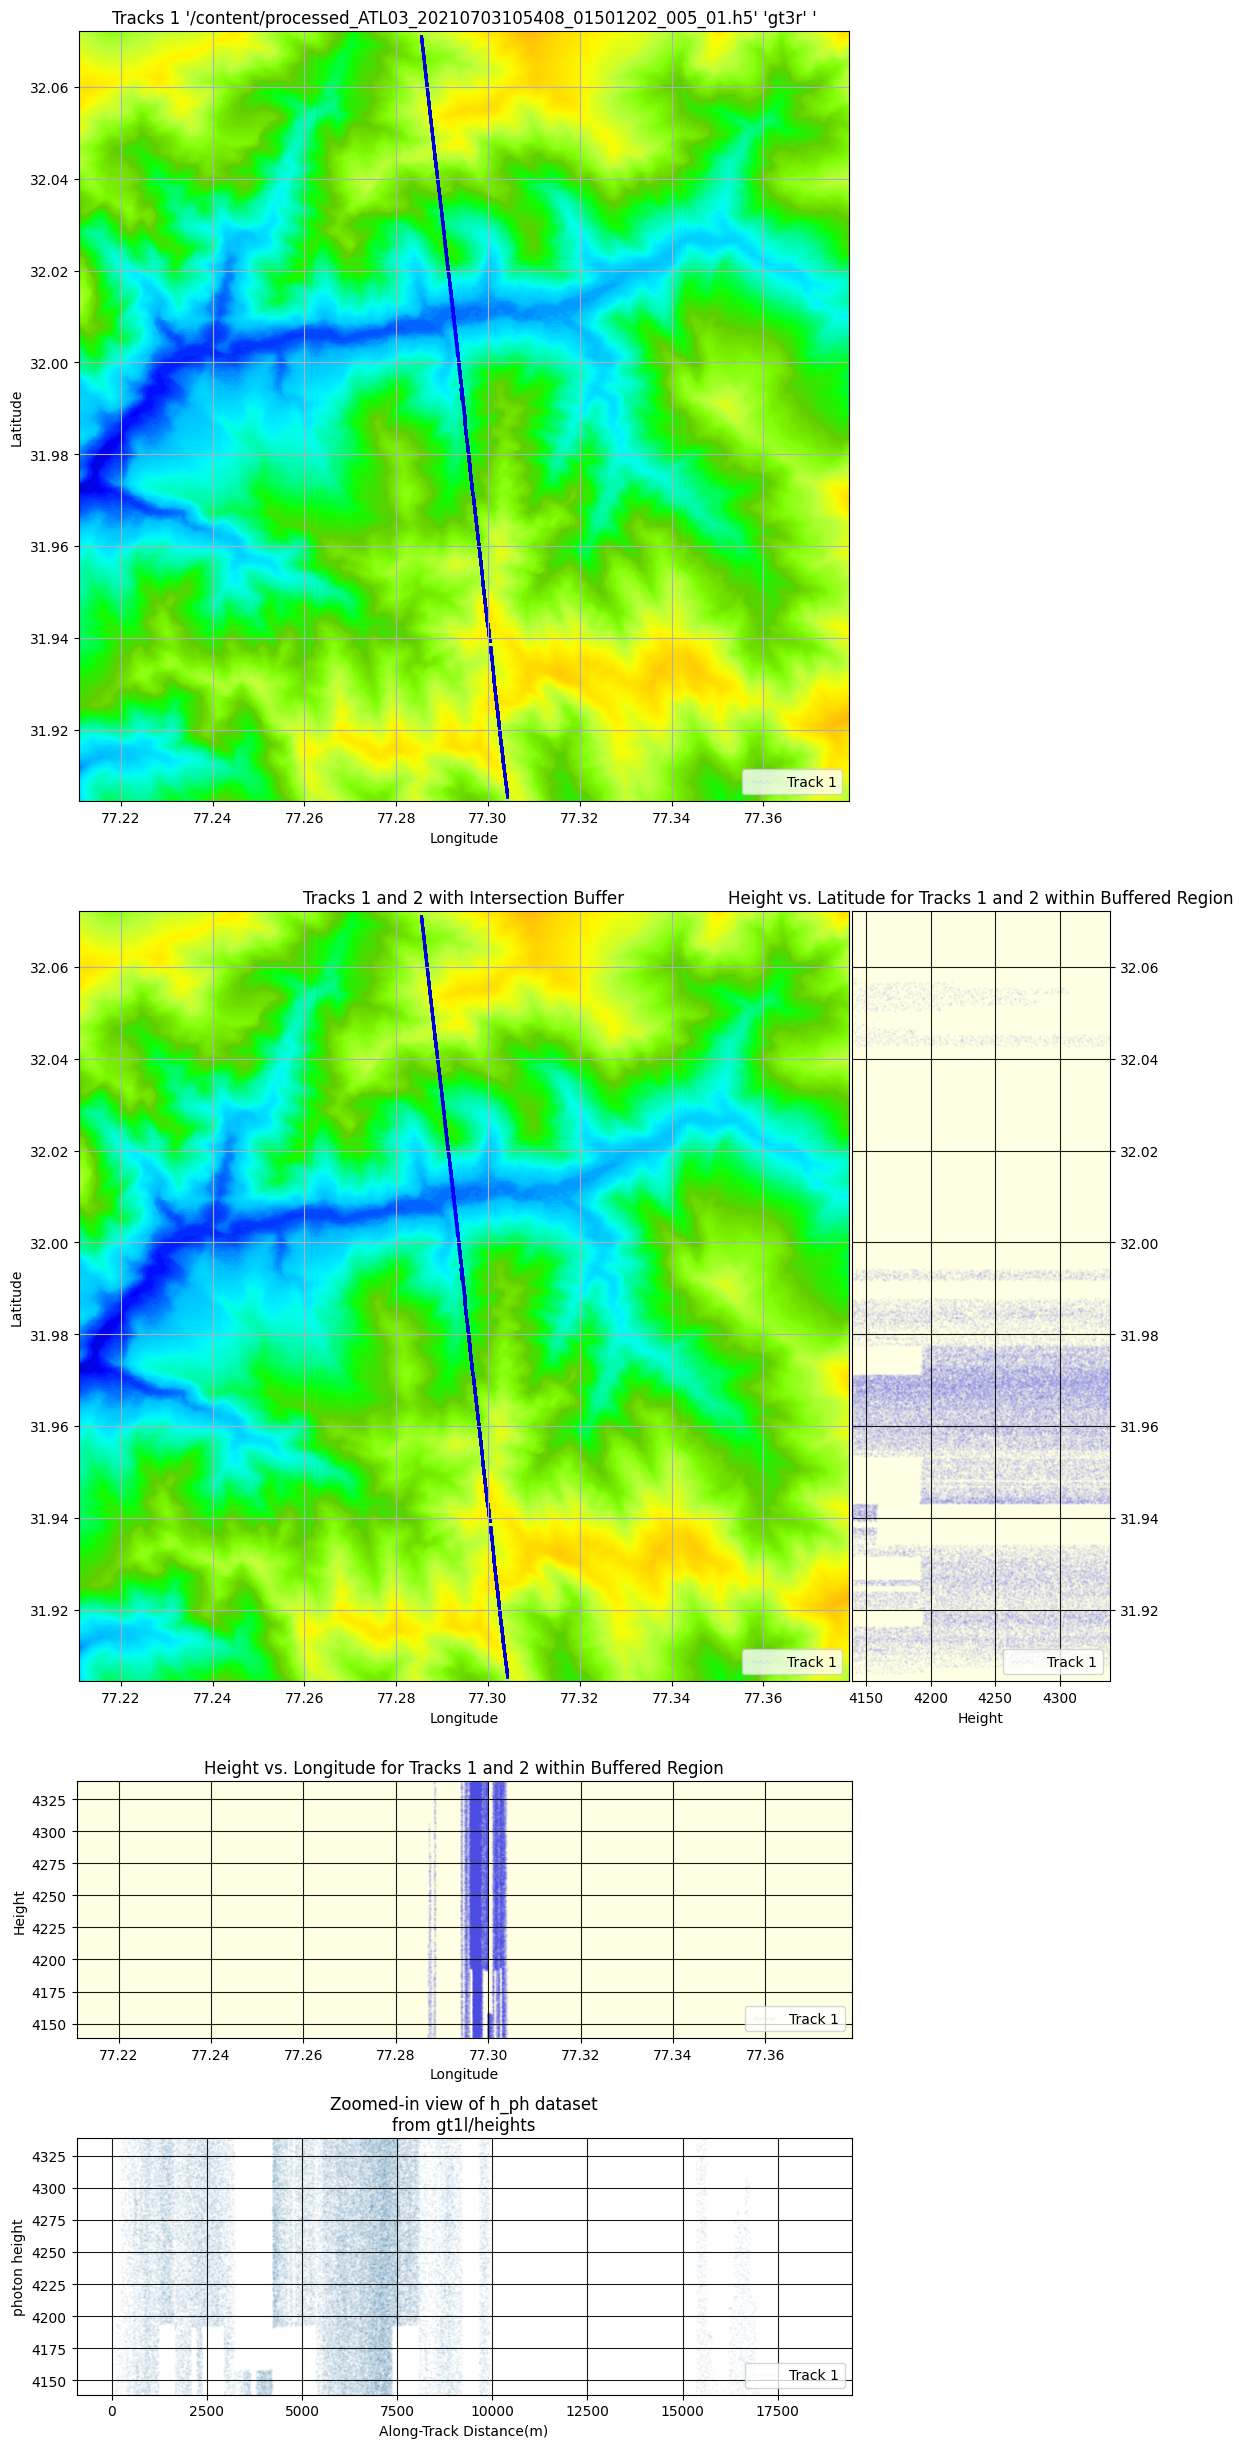

In [6]:
import rasterio
from rasterio.plot import show

dem_in = rasterio.open('/content/ASTER_DEM.tif')
out_data = dem_in.read(1, masked=1)

import numpy as np
import matplotlib.pyplot as plt
#@title **tracks buffer plot with its intersections at centre as well as height vs lat/lon of the buffered region**{ vertical-output: true }
fsize = 10
filename_1 = "/content/processed_ATL03_20210703105408_01501202_005_01.h5" #@param {type:"string"}
# filename_2 = "/content/processed_ATL03_20200211111433_07140602_005_01.h5" #@param {type:"string"}
tr_1 = "gt3r" #@param ["gt1l", "gt1r", "gt2l", "gt2r", "gt3l", "gt3r"]
# tr_2 = "gt1r" #@param ["gt1l", "gt1r", "gt2l", "gt2r", "gt3l", "gt3r"]


import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import jax.numpy as jnp
################################################################################
# Calculate distance along track using haversine formula
def haversine(lat1, lon1, lat2, lon2):
  R = 6371.0  # Earth radius in km
  dLat = np.radians(lat2 - lat1)
  dLon = np.radians(lon2 - lon1)
  lat1 = np.radians(lat1)
  lat2 = np.radians(lat2)
  a = np.sin(dLat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dLon/2)**2
  c = 2*np.arcsin(np.sqrt(a))
  return R*c*1000.0
################################################################################
def get_height_lat_lon(filename, track_name):
  # Open the HDF5 file and extract data
  f = h5py.File(filename, 'r')
  h_ph_data = f['/'+str(track_name)+'/heights/h_ph']
  lat_ph_data = f['/'+str(track_name)+'/heights/lat_ph']
  lon_ph_data = f['/'+str(track_name)+'/heights/lon_ph']
  return h_ph_data, lat_ph_data, lon_ph_data
################################################################################
h_ph_data1, lat1, lon1 = get_height_lat_lon(filename_1, tr_1)
# h_ph_data2, lat2, lon2 = get_height_lat_lon(filename_2, tr_2)
################################################################################
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
pos = ax.get_position()
w_x, h_y = pos.width, pos.height
################################################################################plotting complete dem and track
lat_1x = np.array(lat1)
lon_1x = np.array(lon1)
# lat_2x = np.array(lat2)
# lon_2x = np.array(lon2)

# Find the bounding box that covers both tracks with a buffer
# min_lon = min(min(lon_1x), min(lon_2x)) - 0.001
# max_lon = max(max(lon_1x), max(lon_2x)) + 0.001
# min_lat = min(min(lat_1x), min(lat_2x)) - 0.001
# max_lat = max(max(lat_1x), max(lat_2x)) + 0.001
min_lon = min(lon_1x) - 0.001
max_lon = max(lon_1x) + 0.001
min_lat = min(lat_1x) - 0.001
max_lat = max(lat_1x) + 0.001

M_lon = (max_lon + min_lon)/2
M_lat = (max_lat + min_lat)/2
dx_boundary_x = max(max_lon - min_lon, max_lat - min_lat)
# Set the limits of the axis to the bounding box
ax.set_xlim(M_lon - dx_boundary_x/2, M_lon + dx_boundary_x/2)
ax.set_ylim(M_lat - dx_boundary_x/2, M_lat + dx_boundary_x/2)
show(dem_in, cmap='gist_ncar', ax=ax)                            #plotting the dem over which the track points can be plotted
# Add a grid to the plot
ax.grid(True)

# Add a legend to the plot
# Add axis labels and a title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# ax.set_title(f"Tracks 1 '{filename_1}' '{tr_1}'\n and \nTracks 2 '{filename_2}' '{tr_2}'")
ax.set_title(f"Tracks 1 '{filename_1}' '{tr_1}' '")

################################################################################
lat_1 = np.array(lat1)
lon_1 = np.array(lon1)
# lat_2 = np.array(lat2)
# lon_2 = np.array(lon2)
################################################################################
from shapely.geometry import Point
from shapely.ops import unary_union
from shapely.geometry import LineString

# Convert the latitudes and longitudes to shapely Point objects
points_1 = [Point(lon, lat) for lat, lon in zip(lat_1, lon_1)]
# points_2 = [Point(lon, lat) for lat, lon in zip(lat_2, lon_2)]

# Find the intersection of the two tracks
# intersection = unary_union([LineString(points_1).intersection(LineString(points_2))])

# intersection = unary_union([LineString(points_1).intersection(LineString(points_1))])


# buffer_region_in_meters = 1000*4 #@param {type:"raw"} # in meters
# buffer_region = 1/(110 * 1000)* buffer_region_in_meters

# Create a buffer around the intersection point
# intersection_buffer = intersection.buffer(buffer_region)
#@title **track in the buffered region with altitude/elevatoion/height buffer control for points visibility with track labels** { vertical-output: true }
# Compute the median height of the tracks within the buffered region
import geopandas as gpd

# Create a GeoDataFrame for the buffered intersection
# intersection_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(intersection_buffer))

# Create a mask for selecting points within the buffered region
# mask_1 = [intersection_buffer.contains(point) for point in points_1]
# mask_2 = [intersection_buffer.contains(point) for point in points_2]

# Select the latitudes, longitudes, and heights within the buffered region for each track
lat_1_buf = lat_1
lon_1_buf = lon_1
height_1_buf = np.array(h_ph_data1)

# lat_2_buf = lat_2[mask_2]
# lon_2_buf = lon_2[mask_2]
# height_2_buf = np.array(h_ph_data2)[mask_2]

##########################################################
# Set the limits of the axis to the bounding box
# Find the bounding box that covers both tracks with a buffer
# min_lon = min(min(lon_1_buf), min(lon_2_buf)) - 0.001
# max_lon = max(max(lon_1_buf), max(lon_2_buf)) + 0.001
# min_lat = min(min(lat_1_buf), min(lat_2_buf)) - 0.001
# max_lat = max(max(lat_1_buf), max(lat_2_buf)) + 0.001

min_lon = min(lon_1_buf) - 0.001
max_lon = max(lon_1_buf) + 0.001
min_lat = min(lat_1_buf) - 0.001
max_lat = max(lat_1_buf) + 0.001

M_lon = (max_lon + min_lon)/2
M_lat = (max_lat + min_lat)/2
dx_boundary = max(max_lon - min_lon, max_lat - min_lat)
###########################################################
################################################################################
ax2 = fig.add_axes([0.5 -w_x/2 , 0-h_y , w_x , h_y])
ax2.set_position([pos.x0 , 0-h_y, pos.width, h_y])
#********************************
pos = ax2.get_position()
w_x, h_y = pos.width, pos.height
#********************************

# x, y = intersection_buffer.exterior.xy

# ax.fill(x, y, alpha=0.6, fc='#fa19b6', ec='#fcc603', linestyle='--', linewidth=1)
ax.scatter(lon_1x, lat_1x, s=1, color='blue', marker='.', label = 'Track 1', alpha=0.06)
# ax.scatter(lon_2x, lat_2x, s=1, color='r', marker='.', label = 'Track 2')
ax.legend(loc='lower right', scatterpoints=10)

show(dem_in, cmap='gist_ncar', ax=ax2)                    #showing the dem on which the tracks will be  plotted

ax2.scatter(lon_1, lat_1,  marker='.', color='blue', s=1, label='Track 1', alpha=0.06)
# ax2.scatter(lon_2, lat_2,  marker='.', color='red', s=1, label='Track 2')
# ax2.fill(x, y, alpha=0.4, fc='#fa19b6', ec='#03fcc6', linestyle='dotted', linewidth=1)

ax2.set_xlim(M_lon - dx_boundary/2, M_lon + dx_boundary/2)
ax2.set_ylim(M_lat - dx_boundary/2, M_lat + dx_boundary/2)

ax2.grid(True)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_title('Tracks 1 and 2 with Intersection Buffer')
ax2.legend(['Track 1', 'Track 2'], loc='lower right', scatterpoints=10)
################################################################################< elevation vs latitude
median_height = np.median(height_1_buf)
buffer_height = 100 #@param {type:"raw"}

ax3 = fig.add_axes([0.5 -w_x/2 , 0-h_y , w_x , h_y], sharey=ax2)
ax3.set_position([pos.x0 + pos.width , pos.y0 , w_x/3, pos.height])

ax3.scatter(height_1_buf, lat_1_buf,  marker='.', color='blue', s=1, label='Track 1', alpha=0.06)
# ax3.scatter(height_2_buf, lat_2_buf,  marker='.', color='red', s=1, label='Track 2')
ax3.set_xlim(M_lat - dx_boundary/2, M_lat + dx_boundary/2)
ax3.axvspan(median_height - buffer_height, median_height + buffer_height, color='#fdffa3', alpha=0.3)
ax3.yaxis.set_label_position('right')
ax3.yaxis.tick_right()
ax3.set_ylabel('Y-axis label', visible=False)
ax3.set_xlim([median_height - buffer_height, median_height + buffer_height])
ax3.set_xlabel('Height')
ax3.set_ylabel('Latitude')
ax3.set_title('Height vs. Latitude for Tracks 1 and 2 within Buffered Region')
ax3.grid(True,  color='black', alpha = 0.9)
ax3.legend(loc='lower right', scatterpoints=10)
################################################################################< elevation vs longitude
ax4 = fig.add_axes([0 , 0 , w_x , h_y/3], sharex=ax2)
ax4.set_position([pos.x0 , pos.y0 - h_y/3 -0.1, pos.width, h_y/3])

ax4.scatter(lon_1_buf, height_1_buf,  marker='.', color='blue', s=1, label='Track 1', alpha=0.06)
# ax4.scatter(lon_2_buf, height_2_buf,  marker='.', color='red', s=1, label='Track 2')
ax4.set_xlim(M_lon - dx_boundary/2, M_lon + dx_boundary/2)
ax4.axhspan(median_height - buffer_height, median_height + buffer_height, color='#fdffa3', alpha=0.3)
ax4.set_ylim([median_height - buffer_height, median_height + buffer_height])
ax4.set_xlabel('Longitude')
ax4.set_ylabel('Height')
ax4.set_title('Height vs. Longitude for Tracks 1 and 2 within Buffered Region', loc='center').set_position([.5, 1.01])
ax4.grid(True,  color='black', alpha = 0.9)
ax4.legend(loc='lower right', scatterpoints=10)
################################################################################< elevation vs track 1 & 2 distances
ax5 = fig.add_axes([0.5 - w_x/2 , -h_y - h_y/3 -h_y/3 , w_x , h_y/3])
ax5.set_position([pos.x0 ,-h_y - h_y/3 -h_y/3 - 0.1 * 2, pos.width, h_y/3])

dist_ph_along_data_1 = [haversine(lat_1_buf[0], lon_1_buf[0], lat_1_buf[i], lon_1_buf[i]) for i in range(len(lat_1_buf))]

# lats = np.flip(lat_2_buf)
# longs = np.flip(lon_2_buf)
# heights = np.flip(height_2_buf)

# dist_ph_along_data_2 = [haversine(lats[0], longs[0], lats[i], longs[i]) for i in range(len(lats))]
ax5.scatter(np.array(dist_ph_along_data_1), np.array(height_1_buf),  marker= '.', s=1, alpha= 0.04, label = "Track 1")
# ax5.scatter(np.array(dist_ph_along_data_2), np.array(heights),  marker= '.', s=1, alpha= 0.4, label = "Track 2")

ax5.set_ylim([median_height - buffer_height, median_height + buffer_height])
ax5.set_xlabel('Along-Track Distance(m)')
ax5.set_ylabel('photon height')
ax5.set_title('Zoomed-in view of h_ph dataset\nfrom gt1l/heights', loc='center')
ax5.grid(True,  color='black', alpha = 0.9)
ax5.legend(loc='lower right', scatterpoints=10)

# Show the plot
plt.subplots_adjust(hspace=0)
plt.show()


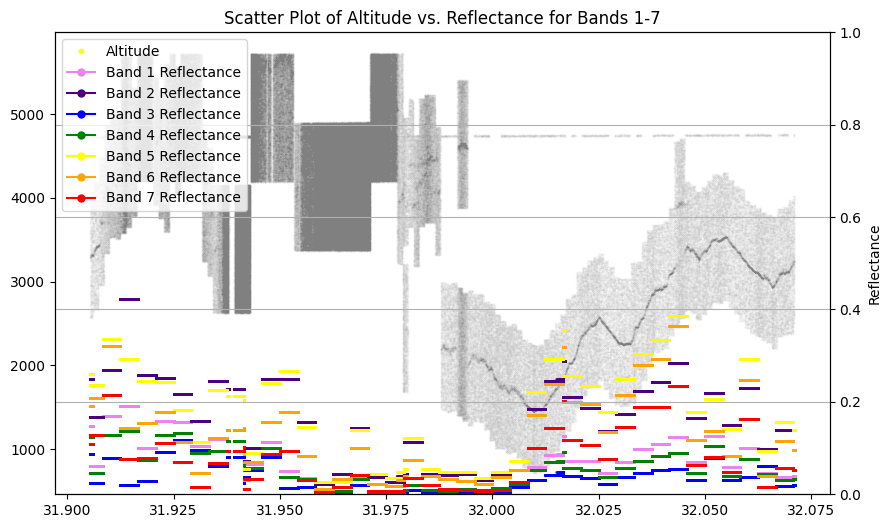

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
#@title **bands reflectances vs height vs lat/lon of the buffered region**{ vertical-output: true }


def extract_pixel_values(raster_path, latitudes, longitudes, band_index=1):
    dataset = gdal.Open(raster_path)
    band = dataset.GetRasterBand(band_index)
    transform = dataset.GetGeoTransform()

    pixel_values = []

    for lat, lon in zip(latitudes, longitudes):
        x_coord = int((lon - transform[0]) / transform[1])
        y_coord = int((lat - transform[3]) / transform[5])

        pixel_value = band.ReadAsArray(x_coord, y_coord, 1, 1)[0, 0]
        pixel_values.append(pixel_value)

    dataset = None
    return pixel_values


def plot_altitude_vs_reflectance(latitudes, longitudes, raster_paths):
    # Define colors for each band
    band_colors = ['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red']

    pixel_values_bands = [extract_pixel_values(raster_path, latitudes, longitudes, band_index=1) for i, raster_path in enumerate(raster_paths, start=1)]

    # Combine the arrays into a single NumPy array
    point_cloud_array = np.column_stack((latitudes, longitudes, height_1_buf, *pixel_values_bands))

    # Your existing code for plotting tracks, height vs. latitude/longitude, and distance vs. height
    # ...

    # Extract third and fourth columns (latitude and altitude)
    x = point_cloud_array[:, 0]  # latitude
    y = point_cloud_array[:, 2]  # altitude

    # Create a scatter plot for altitude on the y-axis
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, s=.1, color='grey', label='Altitude', alpha=0.03)

    ax2 = plt.gca().twinx()
    ax2.set_ylabel(f'Reflectance')

    # Create a second y-axis for the band reflectance with different colors
    for i, band_label in enumerate(['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5', 'Band 6', 'Band 7']):
        reflectance = point_cloud_array[:, 3 + i] * 0.0001  # Scale the reflectance to 0-1 range
        ax2.scatter(x, reflectance, s=1, alpha=0.3, label=f'{band_label} Reflectance', color=band_colors[i])
        ax2.set_ylim(0, 1)  # Set the y-axis range for reflectance

    # Set labels and legend
    plt.xlabel('Latitude')
    plt.title('Scatter Plot of Altitude vs. Reflectance for Bands 1-7')

    # Create a legend for both the altitude and reflectance
    altitude_legend = plt.Line2D([0], [0], marker='o', color='w', label='Altitude', markerfacecolor='yellow', markersize=5)
    reflectance_legend = [plt.Line2D([0], [0], marker='o', color=band_colors[i], label=f'{band_label} Reflectance', markerfacecolor=band_colors[i], markersize=5) for i, band_label in enumerate(['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5', 'Band 6', 'Band 7'])]
    plt.legend(handles=[altitude_legend, *reflectance_legend], loc='upper left')

    plt.grid(True)

    return plt  # Return the plot object

# Example usage
latitudes = lat_1_buf
longitudes = lon_1_buf

# Change the band_index argument to the corresponding band number (1 to 7)
raster_paths = [
    "/content/MOD09A1.061_sur_refl_b01_doy2023001_aid0001.tif",
    "/content/MOD09A1.061_sur_refl_b02_doy2023001_aid0001.tif",
    "/content/MOD09A1.061_sur_refl_b03_doy2023001_aid0001.tif",
    "/content/MOD09A1.061_sur_refl_b04_doy2023001_aid0001.tif",
    "/content/MOD09A1.061_sur_refl_b05_doy2023001_aid0001.tif",
    "/content/MOD09A1.061_sur_refl_b06_doy2023001_aid0001.tif",
    "/content/MOD09A1.061_sur_refl_b07_doy2023001_aid0001.tif"
]

altitude_vs_reflectance_plot = plot_altitude_vs_reflectance(latitudes, longitudes, raster_paths)

# You can use the returned 'altitude_vs_reflectance_plot' object in another plot or save it to a file.
# For example, to save it as an image file:
# altitude_vs_reflectance_plot.savefig('altitude_vs_reflectance_plot.png')

# To show the plot
plt.show()
